A practical introduction to Pandas
===================

We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the attached file. What does it contain, in both technical and functional terms? (Use any tool you want)

In [8]:
! ls 

 06-intro_to_pandas_practical.EGH.ipynb
'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_9.csv'
 readme.html


In this example, I am using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that the specific commands available under the ! sign are dependent on the OS.

### Check what the file contains

unzip:  cannot find or open Basecamp, Basecamp.zip or Basecamp.ZIP.


Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

Use the shell of your OS or the GUI.

Remember, since zip files contain several compressed files, we need to specify which one we want.

### Take a look at the beginning of the readme file

using the shell

The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html))

In [10]:
from IPython.display import IFrame

IFrame('https://www.elpais.com', 800, 300)

In [11]:
IFrame('readme.html', 800, 300)

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out [zipfile.ZipFile](https://docs.python.org/3/library/zipfile.html)

First, open a connection to one of the files

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_9.zip')

FileNotFoundError: [Errno 2] No such file or directory: 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_9.zip'

In [15]:
from zipfile import ZipFile

zf = ZipFile('On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2019_9.zip')
zf

<zipfile.ZipFile filename='On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2019_9.zip' mode='r'>

zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

In [17]:
zf.filelist

[<ZipInfo filename='On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_9.csv' compress_type=deflate filemode='-rw-r--r--' file_size=272856955 compress_size=30506023>,
 <ZipInfo filename='readme.html' compress_type=deflate filemode='-rw-r--r--' file_size=12152 compress_size=2244>]

In [18]:
zf.filelist[0]

<ZipInfo filename='On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_9.csv' compress_type=deflate filemode='-rw-r--r--' file_size=272856955 compress_size=30506023>

In [20]:
csv = zf.open(zf.filelist[0])
csv

<zipfile.ZipExtFile name='On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_9.csv' mode='r' compress_type=deflate>

In [21]:
csv.readline()

b'"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","Reporting_Airline","DOT_ID_Reporting_Airline","IATA_CODE_Reporting_Airline","Tail_Number","Flight_Number_Reporting_Airline","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","Div

In [22]:
csv.readline()

b'2019,3,9,2,1,2019-09-02,"NK",20416,"NK","N631NK","1004",11697,1169706,32467,"FLL","Fort Lauderdale, FL","FL","12","Florida",33,14100,1410005,34100,"PHL","Philadelphia, PA","PA","42","Pennsylvania",23,"2055","",,,,,"2000-2059",,"","",,"2343","",,,,,"2300-2359",1.00,"B",0.00,168.00,,,1.00,992.00,4,,,,,,"",,,0,,,,,"",,,"",,,"","","",,,"",,,"","","",,,"",,,"","","",,,"",,,"","","",,,"",,,"","",\n'

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [23]:
df = pd.read_csv(csv)
df.head()

/home/elsa/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (48,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,2019,3,9,3.1,2,2019-09-03,NK,20416,NK.1,N620NK,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
0,2019,3,9,4,3,2019-09-04,NK,20416,NK,N665NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,3,9,5,4,2019-09-05,NK,20416,NK,N672NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,3,9,6,5,2019-09-06,NK,20416,NK,N671NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,9,7,6,2019-09-07,NK,20416,NK,N675NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,3,9,8,7,2019-09-08,NK,20416,NK,N657NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
csv.seek(0)
csv = zf.open(zf.filelist[0])
df = pd.read_csv(csv)
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2019,3,9,2,1,2019-09-02,NK,20416,NK,N631NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,3,9,3,2,2019-09-03,NK,20416,NK,N620NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,3,9,4,3,2019-09-04,NK,20416,NK,N665NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,9,5,4,2019-09-05,NK,20416,NK,N672NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,3,9,6,5,2019-09-06,NK,20416,NK,N671NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's start examining the data: show the beginning of the file. How many records does it contain?

In [29]:
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
483652,2019,3,9,26,4,2019-09-26,DL,19790,DL,N815DN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314113,2019,3,9,26,4,2019-09-26,AA,19805,AA,N817AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12676,2019,3,9,19,4,2019-09-19,NK,20416,NK,N902NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126598,2019,3,9,24,2,2019-09-24,OO,20304,OO,N789SK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420133,2019,3,9,25,3,2019-09-25,MQ,20398,MQ,N254NN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.shape

(605979, 110)

In [32]:
pd.options.display.max_columns
# por defecto tiene 20

20

In [33]:
pd.options.display.max_columns = None

In [34]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2019,3,9,2,1,2019-09-02,NK,20416,NK,N631NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2055,NaN,NaN,NaN,NaN,NaN,2000-2059,NaN,NaN,NaN,NaN,2343,NaN,NaN,NaN,NaN,NaN,2300-2359,1.0,B,0.0,168.0,NaN,NaN,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,3,9,3,2,2019-09-03,NK,20416,NK,N620NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2055,2048.0,-7.0,0.0,0.0,-1.0,2000-2059,14.0,2102.0,2312.0,11.0,2343,2323.0,-20.0,0.0,0.0,-2.0,2300-2359,0.0,NaN,0.0,168.0,155.0,130.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,3,9,4,3,2019-09-04,NK,20416,NK,N665NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2054.0,9.0,9.0,0.0,0.0,2000-2059,12.0,2106.0,2338.0,13.0,2333,2351.0,18.0,18.0,1.0,1.0,2300-2359,0.0,NaN,0.0,168.0,177.0,152.0,1.0,992.0,4,9.0,0.0,9.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,9,5,4,2019-09-05,NK,20416,NK,N672NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2044.0,-1.0,0.0,0.0,-1.0,2000-2059,15.0,2059.0,2317.0,13.0,2340,2330.0,-10.0,0.0,0.0,-1.0,2300-2359,0.0,NaN,0.0,175.0,166.0,138.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,3,9,6,5,2019-09-06,NK,20416,NK,N671NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2040.0,-5.0,0.0,0.0,-1.0,2000-2059,10.0,2050.0,2259.0,11.0,2340,2310.0,-30.0,0.0,0.0,-2.0,2300-2359,0.0,NaN,0.0,175.0,150.0,129.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Na

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

In [35]:
df.isna().sum()

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
                     ...  
Div5TotalGTime      605979
Div5LongestGTime    605979
Div5WheelsOff       605979
Div5TailNum         605979
Unnamed: 109        605979
Length: 110, dtype: int64

In [36]:
df.isna().sum().sort_values(ascending=False)

Unnamed: 109        605979
Div4WheelsOn        605979
Div5TailNum         605979
Div3Airport         605979
Div3AirportID       605979
                     ...  
DestState                0
DestCityName             0
Dest                     0
DestCityMarketID         0
Year                     0
Length: 110, dtype: int64

In [37]:
df.notna().sum().sort_values()
# mejor opcion

Unnamed: 109             0
Div3Airport              0
Div3AirportID            0
Div3AirportSeqID         0
Div3WheelsOn             0
                     ...  
Dest                605979
DestCityMarketID    605979
DestAirportSeqID    605979
DestWac             605979
Distance            605979
Length: 110, dtype: int64

In [42]:
almost_empty_cols = df.columns[df.notna().sum()<=1000]
almost_empty_cols

Index(['Div2Airport', 'Div2AirportID', 'Div2AirportSeqID', 'Div2WheelsOn',
       'Div2TotalGTime', 'Div2LongestGTime', 'Div2WheelsOff', 'Div2TailNum',
       'Div3Airport', 'Div3AirportID', 'Div3AirportSeqID', 'Div3WheelsOn',
       'Div3TotalGTime', 'Div3LongestGTime', 'Div3WheelsOff', 'Div3TailNum',
       'Div4Airport', 'Div4AirportID', 'Div4AirportSeqID', 'Div4WheelsOn',
       'Div4TotalGTime', 'Div4LongestGTime', 'Div4WheelsOff', 'Div4TailNum',
       'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID', 'Div5WheelsOn',
       'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum',
       'Unnamed: 109'],
      dtype='object')

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [43]:
df2 = df.drop(almost_empty_cols, axis = 1)

In [44]:
df2 = df.dropna(axis=1, thresh=1000)
# con el axis le quitamos la columna

In [45]:
df2.shape

(605979, 77)

In [ ]:
df.drop(df.columns[:2], axis=1).columns
# asi borras las dos primeras columnas

Now that we have eliminated some inconvenient data columns, let's have a look at the rest: let's loook at how the location data is encoded.


#### Exercise:

First, generate a list of the columns that have 'Origin' in their name

Second, show a sample of the values that those columns take.

Hint: we are going to use the str attribute of Series and Indexes


In [47]:
df.head(0)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109


In [59]:
def columns_with_origin(dataframe):
    list_of_columns = []
    for column in dataframe:
        if 'Origin' in column:
            list_of_columns.append(column)
            
    return list_of_columns    

# mejor usar los atributos de str

In [63]:
columns_with_origin(df2)

['OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac']

In [64]:
df2.columns.str.contains('Origin')

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [66]:
df2.columns[df2.columns.str.contains('Origin')]

Index(['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac'],
      dtype='object')

In [68]:
df2[['Year','Month']]

,Year,Month
0,2019,9
1,2019,9
2,2019,9
3,2019,9
4,2019,9
...,...,...
605974,2019,9
605975,2019,9
605976,2019,9
605977,2019,9


In [67]:
df2[df2.columns[df2.columns.str.contains('Origin')]]

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
0,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33
1,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33
2,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33
3,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33
4,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33
...,...,...,...,...,...,...,...,...,...
605974,15624,1562404,31504,VPS,"Valparaiso, FL",FL,12,Florida,33
605975,15624,1562404,31504,VPS,"Valparaiso, FL",FL,12,Florida,33
605976,15624,1562404,31504,VPS,"Valparaiso, FL",FL,12,Florida,33
605977,15624,1562404,31504,VPS,"Valparaiso, FL",FL,12,Florida,33


In [69]:
df2[df2.columns[df2.columns.str.contains('Origin')]].sample(10)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
409502,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41
364487,15016,1501606,31123,STL,"St. Louis, MO",MO,29,Missouri,64
278252,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85
335374,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81
593770,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82
70229,13204,1320402,31454,MCO,"Orlando, FL",FL,12,Florida,33
338977,14122,1412202,30198,PIT,"Pittsburgh, PA",PA,42,Pennsylvania,23
153214,10299,1029906,30299,ANC,"Anchorage, AK",AK,2,Alaska,1
404497,14783,1478302,34783,SGF,"Springfield, MO",MO,29,Missouri,64
93266,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41


In [70]:
df2.loc[70229]
# iloc sirve para referirse a la posicion y loc al nombre

Year                2019
Quarter                3
Month                  9
DayofMonth            17
DayOfWeek              2
                    ... 
Div1WheelsOn         NaN
Div1TotalGTime       NaN
Div1LongestGTime     NaN
Div1WheelsOff        NaN
Div1TailNum          NaN
Name: 70229, Length: 77, dtype: object

In [65]:
df2.columns[:2]

Index(['Year', 'Quarter'], dtype='object')

In [53]:
df.head().apply(columns)

TypeError: ("argument of type 'int' is not iterable", 'occurred at index Year')

So much redundant information!

## Fast forward

Just taking out the redundant columns would take a while, so let's jump ahead with this list of interesting columns:

```python
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']
```

In [71]:
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']

df3 = df2[interesting_columns]
df3.shape

(605979, 17)

## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

In [73]:
df3.dtypes

FlightDate                          object
DayOfWeek                            int64
Reporting_Airline                   object
Tail_Number                         object
Flight_Number_Reporting_Airline      int64
Origin                              object
OriginCityName                      object
OriginStateName                     object
OriginCityMarketID                   int64
Dest                                object
DestCityName                        object
DestStateName                       object
DestCityMarketID                     int64
DepTime                            float64
DepDelay                           float64
AirTime                            float64
Distance                           float64
dtype: object

Pandas interpreted the Deptime column as ints and the FlightDate column as strings. We might want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes. For that, we would need to use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html).

Also, a pet peeve of mine: Flight numbers are names, not numbers!

In [75]:
df3['Flight_Number_Reporting_Airline'].astype(str)

0         1004
1         1004
2         1004
3         1004
4         1004
          ... 
605974    5709
605975    5709
605976    5709
605977    5709
605978    5709
Name: Flight_Number_Reporting_Airline, Length: 605979, dtype: object

In [76]:
df3['Flight_Number_Reporting_Airline'] = df3['Flight_Number_Reporting_Airline'].astype(str)

/home/elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
df3.dtypes

FlightDate                          object
DayOfWeek                            int64
Reporting_Airline                   object
Tail_Number                         object
Flight_Number_Reporting_Airline     object
Origin                              object
OriginCityName                      object
OriginStateName                     object
OriginCityMarketID                   int64
Dest                                object
DestCityName                        object
DestStateName                       object
DestCityMarketID                     int64
DepTime                            float64
DepDelay                           float64
AirTime                            float64
Distance                           float64
dtype: object

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

#### Exercise:

Find the biggest delays: 5 maximum delays.

In [78]:
df3

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
0,2019-09-02,1,NK,N631NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,NaN,NaN,NaN,992.0
1,2019-09-03,2,NK,N620NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2048.0,-7.0,130.0,992.0
2,2019-09-04,3,NK,N665NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2054.0,9.0,152.0,992.0
3,2019-09-05,4,NK,N672NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2044.0,-1.0,138.0,992.0
4,2019-09-06,5,NK,N671NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2040.0,-5.0,129.0,992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605974,2019-09-26,4,OH,N607NN,5709,VPS,"Valparaiso, FL",Florida,31504,CLT,"Charlotte, NC",North Carolina,31057,1847.0,-12.0,69.0,460.0
605975,2019-09-27,5,OH,N590NN,5709,VPS,"Valparaiso, FL",Florida,31504,CLT,"Charlotte, NC",North Carolina,31057,1857.0,-2.0,75.0,460.0
605976,2019-09-28,6,OH,N608NN,5709,VPS,"Valparaiso, FL",Florida,31504,CLT,"Charlotte, NC",North Carolina,31057,1849.0,-10.0,69.0,460.0
605977,2019-09-29,7,OH,N591NN,5709,VPS,"Valparaiso, FL",Florida,31504,CLT,"Charlotte, NC",North Carolina,31057,1852.0,-7.0,68.0,460.0


In [80]:
df3['DepDelay'].describe()

count    596198.000000
mean          6.421335
std          41.306174
min         -62.000000
25%          -6.000000
50%          -3.000000
75%           2.000000
max        1753.000000
Name: DepDelay, dtype: float64

In [82]:
df3['DepDelay'].sort_values(ascending=False)

413463    1753.0
390701    1584.0
587829    1525.0
141845    1513.0
107081    1506.0
           ...  
605494       NaN
605510       NaN
605536       NaN
605554       NaN
605555       NaN
Name: DepDelay, Length: 605979, dtype: float64

In [83]:
df3['DepDelay'].sort_values(ascending=False)[:5]

413463    1753.0
390701    1584.0
587829    1525.0
141845    1513.0
107081    1506.0
Name: DepDelay, dtype: float64

In [91]:
df3.sort_values(by='DepDelay', ascending=False)[:5]

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
413463,2019-09-09,1,MQ,N697AB,3573,RST,"Rochester, MN",Minnesota,32547,ORD,"Chicago, IL",Illinois,30977,1942.0,1753.0,50.0,268.0
390701,2019-09-02,1,EV,N14573,4162,CVG,"Cincinnati, OH",Kentucky,33105,ORD,"Chicago, IL",Illinois,30977,2214.0,1584.0,49.0,264.0
587829,2019-09-16,1,UA,N19130,2032,MCO,"Orlando, FL",Florida,31454,EWR,"Newark, NJ",New Jersey,31703,830.0,1525.0,123.0,937.0
141845,2019-09-27,5,OO,N150SY,5441,MSP,"Minneapolis, MN",Minnesota,31650,ORD,"Chicago, IL",Illinois,30977,1215.0,1513.0,54.0,334.0
107081,2019-09-16,1,OO,N836SK,3633,ICT,"Wichita, KS",Kansas,30928,MSP,"Minneapolis, MN",Minnesota,31650,731.0,1506.0,77.0,545.0


In [90]:
df3.sort_values(by='DepDelay', ascending=False).head(5)
# mejor asi

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
413463,2019-09-09,1,MQ,N697AB,3573,RST,"Rochester, MN",Minnesota,32547,ORD,"Chicago, IL",Illinois,30977,1942.0,1753.0,50.0,268.0
390701,2019-09-02,1,EV,N14573,4162,CVG,"Cincinnati, OH",Kentucky,33105,ORD,"Chicago, IL",Illinois,30977,2214.0,1584.0,49.0,264.0
587829,2019-09-16,1,UA,N19130,2032,MCO,"Orlando, FL",Florida,31454,EWR,"Newark, NJ",New Jersey,31703,830.0,1525.0,123.0,937.0
141845,2019-09-27,5,OO,N150SY,5441,MSP,"Minneapolis, MN",Minnesota,31650,ORD,"Chicago, IL",Illinois,30977,1215.0,1513.0,54.0,334.0
107081,2019-09-16,1,OO,N836SK,3633,ICT,"Wichita, KS",Kansas,30928,MSP,"Minneapolis, MN",Minnesota,31650,731.0,1506.0,77.0,545.0


#### Exercise

What was the average delay for this month? Standard deviation and typical value?

In [93]:
df3['DepDelay'].agg(['mean','std','median'])

mean       6.421335
std       41.306174
median    -3.000000
Name: DepDelay, dtype: float64

In [96]:
df3.describe()

,DayOfWeek,OriginCityMarketID,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
count,605979.000000,605979.000000,605979.000000,596198.000000,596198.000000,594716.000000,605979.000000
mean,3.924228,31727.722362,31727.890871,1328.786985,6.421335,108.495852,787.482718
std,2.074963,1302.291509,1302.457897,497.344200,41.306174,68.889984,588.102800
min,1.000000,30070.000000,30070.000000,1.000000,-62.000000,6.000000,31.000000
25%,2.000000,30693.000000,30693.000000,916.000000,-6.000000,59.000000,361.000000
50%,4.000000,31453.000000,31453.000000,1322.000000,-3.000000,90.000000,622.000000
75%,6.000000,32467.000000,32467.000000,1738.000000,2.000000,136.000000,1013.000000
max,7.000000,35991.000000,35991.000000,2400.000000,1753.000000,665.000000,5095.000000


Also: a quick look at the correlation between the numerical variables is extremely easy with pandas:

In [97]:
df3.corr()

,DayOfWeek,OriginCityMarketID,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
DayOfWeek,1.000000,0.003038,0.003036,0.003018,-0.005445,0.013200,0.013701
OriginCityMarketID,0.003038,1.000000,-0.052015,-0.052797,-0.010868,0.004599,0.006441
DestCityMarketID,0.003036,-0.052015,1.000000,0.062610,0.001942,0.007615,0.005803
DepTime,0.003018,-0.052797,0.062610,1.000000,0.117495,-0.023755,-0.018450
DepDelay,-0.005445,-0.010868,0.001942,0.117495,1.000000,0.026840,0.024777
AirTime,0.013200,0.004599,0.007615,-0.023755,0.026840,1.000000,0.989630
Distance,0.013701,0.006441,0.005803,-0.018450,0.024777,0.989630,1.000000


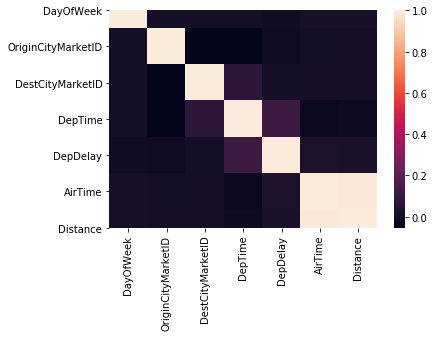

In [98]:
import seaborn as sns

sns.heatmap(df3.corr())

#### Exercise

What is the plane that has the highest average delay? We'll first group by tail number (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

In [99]:
df3

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
0,2019-09-02,1,NK,N631NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,NaN,NaN,NaN,992.0
1,2019-09-03,2,NK,N620NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2048.0,-7.0,130.0,992.0
2,2019-09-04,3,NK,N665NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2054.0,9.0,152.0,992.0
3,2019-09-05,4,NK,N672NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2044.0,-1.0,138.0,992.0
4,2019-09-06,5,NK,N671NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2040.0,-5.0,129.0,992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605974,2019-09-26,4,OH,N607NN,5709,VPS,"Valparaiso, FL",Florida,31504,CLT,"Charlotte, NC",North Carolina,31057,1847.0,-12.0,69.0,460.0
605975,2019-09-27,5,OH,N590NN,5709,VPS,"Valparaiso, FL",Florida,31504,CLT,"Charlotte, NC",North Carolina,31057,1857.0,-2.0,75.0,460.0
605976,2019-09-28,6,OH,N608NN,5709,VPS,"Valparaiso, FL",Florida,31504,CLT,"Charlotte, NC",North Carolina,31057,1849.0,-10.0,69.0,460.0
605977,2019-09-29,7,OH,N591NN,5709,VPS,"Valparaiso, FL",Florida,31504,CLT,"Charlotte, NC",North Carolina,31057,1852.0,-7.0,68.0,460.0


In [114]:
grouped = df3.groupby('Tail_Number')['DepDelay'].mean()
grouped

Tail_Number
215NV     2.253521
216NV     1.014286
217NV     5.215909
218NV     0.861538
219NV    -4.737374
            ...   
N998DL    5.424242
N998JE   -1.881579
N998NN    4.453333
N999DN    0.240000
N999JQ   -2.363636
Name: DepDelay, Length: 5392, dtype: float64

In [115]:
grouped.sort_values(ascending=False)

Tail_Number
N216UA    401.666667
N13954    276.000000
N799UA    239.333333
N648UA    236.666667
N225UA    207.000000
             ...    
N563JB           NaN
N611UX           NaN
N716EV           NaN
N7886A           NaN
N9011P           NaN
Name: DepDelay, Length: 5392, dtype: float64

In [111]:
grouped.sort_values(ascending=False).head(1)

Tail_Number
N216UA    401.666667
Name: DepDelay, dtype: float64

In [131]:
df3.groupby('Tail_Number')['DepDelay'].mean().sort_values(ascending=False).head(1)

Tail_Number
N216UA    401.666667
Name: DepDelay, dtype: float64

Oh, but those numbers smell like these planes had only a few, very delayed, departures! how can we count the number of departures *and* calculate the average delay at the same time?

In [135]:
df3.groupby('Tail_Number')['DepDelay'].agg(['mean','count'])

,mean,count
Tail_Number,,
215NV,2.253521,71
216NV,1.014286,70
217NV,5.215909,88
218NV,0.861538,65
219NV,-4.737374,99
...,...,...
N998DL,5.424242,132
N998JE,-1.881579,76
N998NN,4.453333,75


In [136]:
df3.groupby('Tail_Number')['DepDelay'].agg(['mean','count']).sort_values(by='mean', ascending=False).head(5)

,mean,count
Tail_Number,,
N216UA,401.666667,3
N13954,276.000000,2
N799UA,239.333333,3
N648UA,236.666667,6
N225UA,207.000000,2


Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

In [207]:
delays_per_plane = df3.groupby('Tail_Number')['DepDelay'].agg(['mean','count'])
consistently_delayed = delays_per_plane[delays_per_plane['count'] >=15].sort_values(by='mean', ascending=False).head(5)
consistently_delayed

,mean,count
Tail_Number,,
N339JB,110.500000,18
N397AN,74.760000,25
N19130,62.183673,49
N777UA,54.645161,62
N771UA,52.438596,57


In [140]:
[tail_number in consistently_delayed for tail_number in df3['Tail_Number']]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [142]:
df3[[tail_number in consistently_delayed.index for tail_number in df3['Tail_Number']]]

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
281057,2019-09-21,6,AA,N397AN,54,MIA,"Miami, FL",Florida,32467,JFK,"New York, NY",New York,31703,856.0,21.0,145.0,1089.0
284270,2019-09-03,2,AA,N397AN,291,JFK,"New York, NY",New York,31703,MIA,"Miami, FL",Florida,32467,1256.0,-3.0,174.0,1089.0
284289,2019-09-22,7,AA,N397AN,291,JFK,"New York, NY",New York,31703,MIA,"Miami, FL",Florida,32467,1224.0,-5.0,132.0,1089.0
284300,2019-09-03,2,AA,N397AN,291,MIA,"Miami, FL",Florida,32467,JFK,"New York, NY",New York,31703,853.0,3.0,159.0,1089.0
292835,2019-09-13,5,AA,N397AN,1496,PHL,"Philadelphia, PA",Pennsylvania,34100,SJU,"San Juan, PR",Puerto Rico,34819,802.0,-8.0,201.0,1576.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594074,2019-09-01,7,UA,N777UA,1101,IAH,"Houston, TX",Texas,31453,DEN,"Denver, CO",Colorado,30325,1012.0,-8.0,107.0,862.0
594325,2019-09-01,7,UA,N771UA,628,EWR,"Newark, NJ",New Jersey,31703,LAX,"Los Angeles, CA",California,32575,2330.0,210.0,304.0,2454.0
594435,2019-09-01,7,UA,N777UA,508,IAH,"Houston, TX",Texas,31453,SFO,"San Francisco, CA",California,32457,1848.0,-2.0,202.0,1635.0
594634,2019-09-01,7,UA,N777UA,313,DEN,"Denver, CO",Colorado,30325,IAH,"Houston, TX",Texas,31453,1325.0,-5.0,108.0,862.0


#### Exercise: 

Show cities by descending number of airports

In [144]:
df3.head()

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
0,2019-09-02,1,NK,N631NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,NaN,NaN,NaN,992.0
1,2019-09-03,2,NK,N620NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2048.0,-7.0,130.0,992.0
2,2019-09-04,3,NK,N665NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2054.0,9.0,152.0,992.0
3,2019-09-05,4,NK,N672NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2044.0,-1.0,138.0,992.0
4,2019-09-06,5,NK,N671NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2040.0,-5.0,129.0,992.0


In [166]:
df3.groupby('OriginCityName')['Origin'].nunique().sort_values(ascending=False)
# con nunique tenemos el numero de aeropuertos, con unique sacariamos la lista de aeropuertos

OriginCityName
Mobile, AL          2
Phoenix, AZ         2
Houston, TX         2
New York, NY        2
Columbus, OH        2
                   ..
North Platte, NE    1
Oakland, CA         1
Ogden, UT           1
Ogdensburg, NY      1
Aberdeen, SD        1
Name: Origin, Length: 344, dtype: int64

In [169]:
df3.groupby('OriginCityName').nunique().sort_values(by='Origin', ascending=False)

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
OriginCityName,,,,,,,,,,,,,,,,,
"Houston, TX",30,7,14,2666,1315,2,1,1,1,108,105,41,95,1132,337,271,146
"Washington, DC",30,7,14,3066,902,2,1,1,1,103,100,41,93,1129,339,334,145
"Chicago, IL",30,7,13,3330,2140,2,1,1,1,173,170,50,157,1166,416,337,216
"New York, NY",30,7,16,3097,1233,2,1,1,1,97,94,39,84,1173,345,380,131
"Mobile, AL",30,7,8,263,32,2,1,1,1,6,6,5,6,244,73,67,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Garden City, KS",30,7,1,30,2,1,1,1,1,1,1,1,1,33,22,17,1
"Gainesville, FL",30,7,5,232,24,1,1,1,1,4,4,4,4,237,74,51,4
"Fresno, CA",30,7,6,357,46,1,1,1,1,11,11,9,11,458,124,146,11


#### Exercise

The list above doesn't correspond to our intuitive expectation, probably. That is because airports serving the same general area may be located within several different city limits. This is encapsulated by the "market" concept in commercial aviation.

Find the 10 markets with the most airports, and which airports are included in them.

In [189]:
df3.groupby('OriginCityMarketID')['Origin'].nunique().sort_values(ascending=False).head(10)
# ahora falta saber el nombre de los aeropuertos y el de las ciudades

OriginCityMarketID
31703    6
32575    5
30721    3
32457    3
30852    3
30647    2
32467    2
31453    2
30194    2
30466    2
Name: Origin, dtype: int64

In [198]:
df3.groupby('OriginCityMarketID')['Origin'].agg(['nunique','unique']).sort_values(by='nunique',ascending=False).head(10)

,nunique,unique
OriginCityMarketID,,
31703,6,"[EWR, LGA, JFK, ISP, HPN, SWF]"
32575,5,"[LAX, BUR, ONT, LGB, SNA]"
32457,3,"[OAK, SFO, SJC]"
30852,3,"[BWI, IAD, DCA]"
30721,3,"[BOS, PVD, MHT]"
33195,2,"[TPA, PIE]"
30466,2,"[PHX, AZA]"
30194,2,"[DFW, DAL]"
33667,2,"[ORF, PHF]"


In [199]:
df3.groupby('OriginCityMarketID')['Origin','OriginCityName'].agg(['nunique','unique'])

Origin        OriginCityName  \
                   nunique unique        nunique   
OriginCityMarketID                                 
30070                    1  [ADQ]              1   
30073                    1  [SCC]              1   
30107                    1  [BRW]              1   
30113                    1  [BET]              1   
30135                    1  [ABE]              1   
...                    ...    ...            ...   
35550                    1  [VLD]              1   
35582                    1  [VEL]              1   
35841                    1  [WRG]              1   
35897                    1  [WYS]              1   
35991                    1  [YAK]              1   

                                                      
                                              unique  
OriginCityMarketID                                    
30070                                   [Kodiak, AK]  
30073                                [Deadhorse, AK]  
30107                                   [Barrow, AK]  
30113                                   [Bethel, AK]  
30135               [Allentown/Bethlehem/Easton, PA]  
...                                              ...  
35550                                 [Valdosta, GA]  
35582                                   [Vernal, UT]  
35841                                 [Wrangell, AK]  
35897                         [West Yellowstone, MT]  
35991                                  [Yakutat, AK]  

[326 rows x 4 columns]

In [200]:
cities_airports = df3.groupby('OriginCityMarketID')['Origin','OriginCityName'].agg(['nunique','unique'])
cities_airports

Origin        OriginCityName  \
                   nunique unique        nunique   
OriginCityMarketID                                 
30070                    1  [ADQ]              1   
30073                    1  [SCC]              1   
30107                    1  [BRW]              1   
30113                    1  [BET]              1   
30135                    1  [ABE]              1   
...                    ...    ...            ...   
35550                    1  [VLD]              1   
35582                    1  [VEL]              1   
35841                    1  [WRG]              1   
35897                    1  [WYS]              1   
35991                    1  [YAK]              1   

                                                      
                                              unique  
OriginCityMarketID                                    
30070                                   [Kodiak, AK]  
30073                                [Deadhorse, AK]  
30107                                   [Barrow, AK]  
30113                                   [Bethel, AK]  
30135               [Allentown/Bethlehem/Easton, PA]  
...                                              ...  
35550                                 [Valdosta, GA]  
35582                                   [Vernal, UT]  
35841                                 [Wrangell, AK]  
35897                         [West Yellowstone, MT]  
35991                                  [Yakutat, AK]  

[326 rows x 4 columns]

In [204]:
cities_airports = df3.groupby('OriginCityMarketID')['Origin','OriginCityName'].agg(['nunique','unique'])
cities_airports.sort_values(by=('OriginCityName','nunique'), ascending=False).head(10)

Origin                                 OriginCityName  \
                   nunique                          unique        nunique   
OriginCityMarketID                                                          
32575                    5       [LAX, BUR, ONT, LGB, SNA]              5   
31703                    6  [EWR, LGA, JFK, ISP, HPN, SWF]              5   
30721                    3                 [BOS, PVD, MHT]              3   
32457                    3                 [OAK, SFO, SJC]              3   
33195                    2                      [TPA, PIE]              2   
30647                    2                      [CLE, CAK]              2   
30852                    3                 [BWI, IAD, DCA]              2   
33667                    2                      [ORF, PHF]              2   
30194                    2                      [DFW, DAL]              2   
32467                    2                      [FLL, MIA]              2   

                                                                       
                                                               unique  
OriginCityMarketID                                                     
32575               [Los Angeles, CA, Burbank, CA, Ontario, CA, Lo...  
31703               [Newark, NJ, New York, NY, Islip, NY, White Pl...  
30721                    [Boston, MA, Providence, RI, Manchester, NH]  
32457                  [Oakland, CA, San Francisco, CA, San Jose, CA]  
33195                                 [Tampa, FL, St. Petersburg, FL]  
30647                                      [Cleveland, OH, Akron, OH]  
30852                                 [Baltimore, MD, Washington, DC]  
33667                    [Norfolk, VA, Newport News/Williamsburg, VA]  
30194                             [Dallas/Fort Worth, TX, Dallas, TX]  
32467                                [Fort Lauderdale, FL, Miami, FL]

In [202]:
cities_airports = df3.groupby(['OriginCityMarketID'])[['Origin','OriginCityName']]
cities_airports = groups.agg({'Origin' : ['nunique','unique']})
cities_airports

NameError: name 'groups' is not defined

In [191]:
df3.groupby('OriginCityMarketID').nunique().sort_values(by='Origin', ascending=False).head(10)
# asi saca el unique de todo

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
OriginCityMarketID,,,,,,,,,,,,,,,,,
31703,30,7,17,3987,1711,6,5,2,1,109,106,43,94,1215,398,409,226
32575,30,7,12,3428,1726,5,5,1,1,91,88,37,82,1252,328,336,157
32457,30,7,12,2958,1636,3,3,1,1,86,82,37,74,1261,351,322,163
30852,30,7,16,3683,1772,3,2,2,1,108,105,42,95,1150,349,341,202
30721,30,7,16,3159,836,3,3,3,1,65,61,31,53,1131,303,392,92
33195,30,7,12,2095,524,2,2,1,1,86,81,35,72,946,201,273,92
30466,30,7,12,2140,1107,2,1,1,1,110,107,38,97,1195,281,325,113
30194,30,7,13,2825,1869,2,2,1,1,180,176,45,168,1175,321,318,211
33667,30,7,13,999,151,2,2,1,1,25,22,16,19,741,157,174,27


In [193]:
df3.groupby('OriginCityMarketID')['Origin','Dest'].nunique()
# para cada market cuantos origenes y destinos

,Origin,Dest
OriginCityMarketID,,
30070,1,1
30073,1,2
30107,1,2
30113,1,1
30135,1,10
...,...,...
35550,1,1
35582,1,1
35841,1,2


## Plotting

There are several ways in which we could go about plotting this dataset in order to get acquainted with it. 

For example, do the delays have a relationship with the number of departures a plane does?

#### Exercise

Do a scatter plot of delays_by_plane with matplotlib, plotting mean delay versus number of departures. Check the documentation

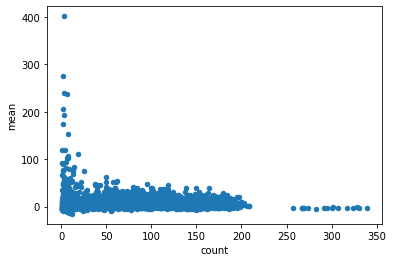

In [209]:
delays_per_plane.plot.scatter('count','mean')
# x es count e y es mean

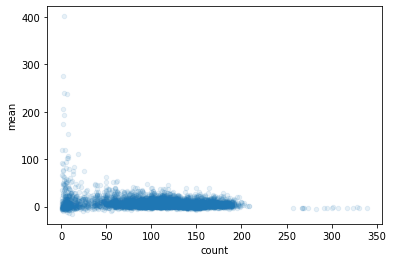

In [210]:
delays_per_plane.plot.scatter('count','mean', alpha=.1)
# no se hace opaco hasta que no coincidan 10 puntos
# asi lo hacemos desde pandas, pero pandas llama por debajo a metodos de matplotlib

In [ ]:
plt.scatter(delays_per_plane)
# mirar clase

Pretty impossible to see anything in there. Maybe a different kind of plottting is required:

(-10, 50)

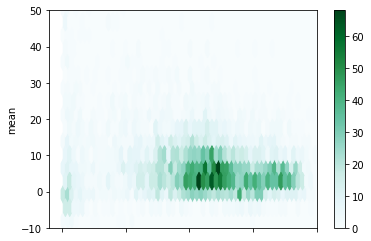

In [211]:
ax = delays_per_plane.plot.hexbin('count','mean')
ax.set_xlim(-10,200)
ax.set_ylim(-10,50)
# crea una rejilla de un mosaico de hexagonos, y pinta por colores el numero de puntos que caen en cada uno

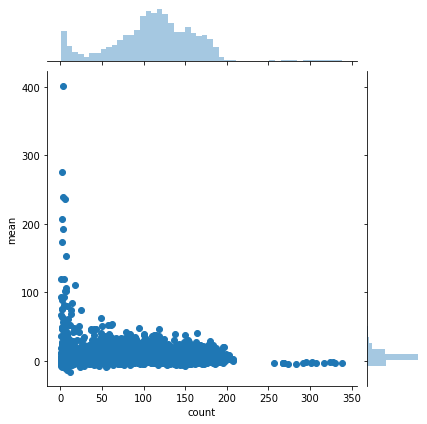

In [212]:
sns.jointplot(data=delays_per_plane, x='count', y='mean')

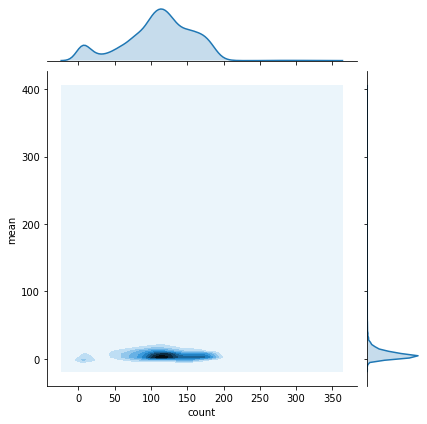

In [215]:
g = sns.jointplot(data=delays_per_plane, x='count', y='mean', kind='kde')
g

#### Exercise:

Plot the distribution of delays as a histogram, both with a linear and a logarithmic scale

In [217]:
df3.head()

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
0,2019-09-02,1,NK,N631NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,NaN,NaN,NaN,992.0
1,2019-09-03,2,NK,N620NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2048.0,-7.0,130.0,992.0
2,2019-09-04,3,NK,N665NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2054.0,9.0,152.0,992.0
3,2019-09-05,4,NK,N672NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2044.0,-1.0,138.0,992.0
4,2019-09-06,5,NK,N671NK,1004,FLL,"Fort Lauderdale, FL",Florida,32467,PHL,"Philadelphia, PA",Pennsylvania,34100,2040.0,-5.0,129.0,992.0


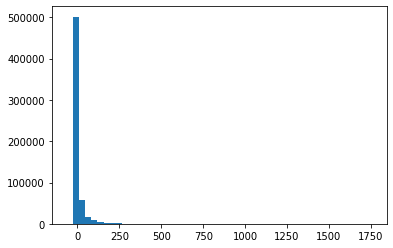

In [230]:
plot = plt.hist(df3['DepDelay'],bins=50)

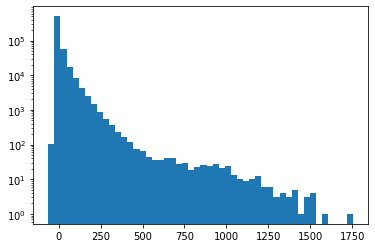

In [240]:
plot = plt.hist(df3['DepDelay'],bins=50)
plt.yscale('log')

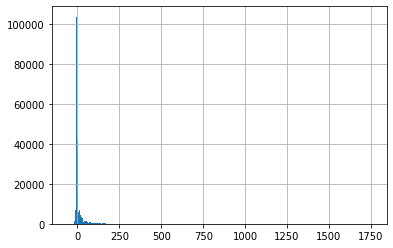

In [237]:
df3['DepDelay'].hist(bins=1000)

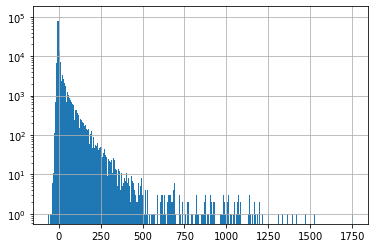

In [238]:
df3['DepDelay'].hist(bins=1000)
plt.yscale('log')

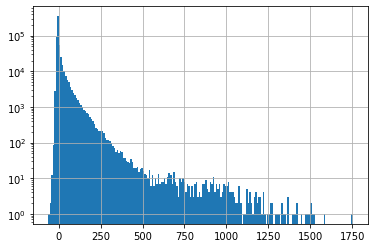

In [241]:
df3['DepDelay'].hist(bins=200, log=True)

#### Exercise:

How do the delays stack over the course of the day? We are going to look at it by plotting the distribution of delays for each hour of the day. The very best way to compare distributions side by side is a boxplot, so we'll use that.

In [242]:
df3['DepTime']

0            NaN
1         2048.0
2         2054.0
3         2044.0
4         2040.0
           ...  
605974    1847.0
605975    1857.0
605976    1849.0
605977    1852.0
605978    2003.0
Name: DepTime, Length: 605979, dtype: float64

In [249]:
df3['DepTime']

0            NaN
1         2048.0
2         2054.0
3         2044.0
4         2040.0
           ...  
605974    1847.0
605975    1857.0
605976    1849.0
605977    1852.0
605978    2003.0
Name: DepTime, Length: 605979, dtype: float64

In [279]:
df3['hour'] = df3['DepTime'].astype(str).str.zfill(6).str[:2]

df3['hour']

/home/elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         00
1         20
2         20
3         20
4         20
          ..
605974    18
605975    18
605976    18
605977    18
605978    20
Name: hour, Length: 605979, dtype: object

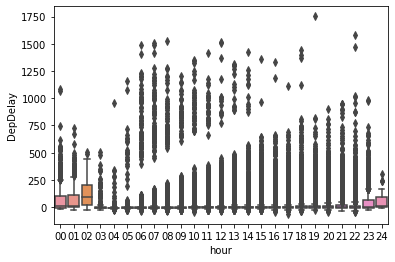

In [280]:
sns.boxplot(data=df3, x='hour', y='DepDelay')
# es mejor hacerlo aritmeticamente

In [281]:
df3['hour'] = df3['DepTime'] // 100

df3['hour'].unique()

/home/elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([nan, 20., 17., 21., 22., 19.,  6.,  8.,  7., 10., 11., 12., 13.,
       14., 15., 16., 18., 23.,  5.,  4.,  9.,  0.,  1.,  2.,  3., 24.])

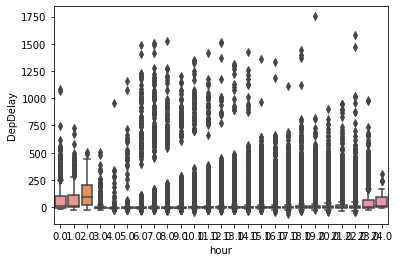

In [282]:
sns.boxplot(data=df3, x='hour', y='DepDelay')

(-20, 250)

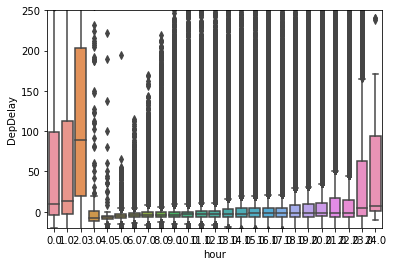

In [283]:
ax = sns.boxplot(data=df3, x='hour', y='DepDelay')
ax.set_ylim(-20,250)

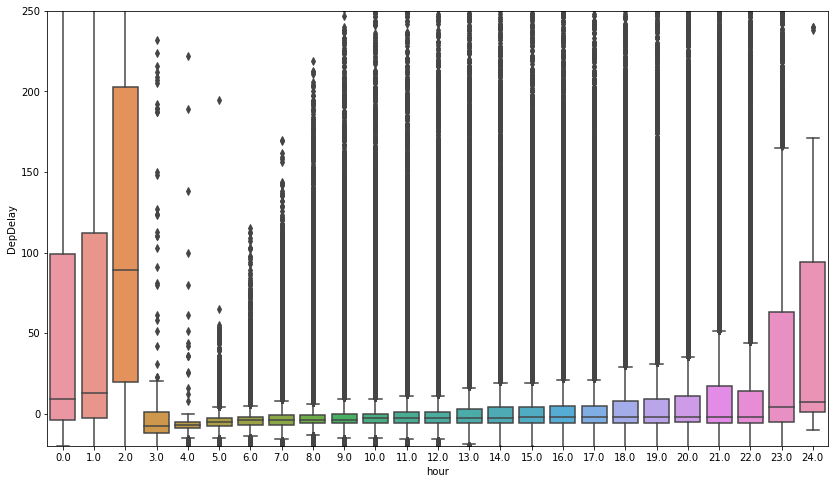

In [284]:
ax = sns.boxplot(data=df3, x='hour', y='DepDelay')
ax.set_ylim(-20,250)
plt.gcf().set_size_inches(14,8)

In [285]:
df3['hour'] = df3['DepTime'].dropna() // 100

df3['hour'].unique()

/home/elsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([nan, 20., 17., 21., 22., 19.,  6.,  8.,  7., 10., 11., 12., 13.,
       14., 15., 16., 18., 23.,  5.,  4.,  9.,  0.,  1.,  2.,  3., 24.])

We need to provide `plt.boxplot()` with a sequence that contains 24 elements. Each of those will be a sequence containing every individual delay for one hour of the day. We'll need, therefore, to extract hours of the day for each departure and group based on that.

#### Exercise

We are also interested in examining how the home base influences delays. Do a boxplot of the delay distribution for the 10 airports with the most flights, and the 10 airports with the least flights.

In [291]:
flights_per_airport = df3.groupby('Origin')['Origin'].count()

bottom_top = pd.concat([flights_per_airport.sort_values(ascending=False).head(10), flights_per_airport.sort_values().head(10)])

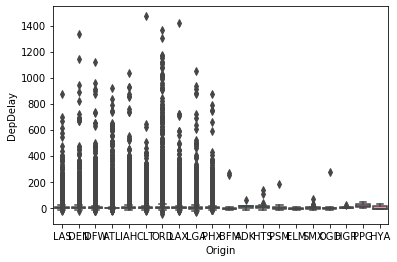

In [294]:
filter = [origin in bottom_top for origin in df3['Origin']]

sns.boxplot(data=df3[filter], x='Origin', y='DepDelay')
# mirar clase

#### Take home project

If we wanted to do some machine learning, we would need to create as many informative features as we thought could be useful. This is called Feature Engineering.

Discrete data would most often be transformed by [one-hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f), which is [very easy to do in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

![One Hot Encoding](https://hackernoon.com/photos/4HK5qyMbWfetPhAavzyTZrEb90N2-3o23tie)

With high cardinality discrete data such as airports or, especially, tail numbers, we would be left with many variables, most of which would not be very informative. There are [several options](https://www.datacamp.com/community/tutorials/encoding-methodologies) to deal with this. The most sophisticated is probably vector encoding, but we can do with a very simple approach: [target encoding](https://maxhalford.github.io/blog/target-encoding-done-the-right-way/).

This means that we substitute each value of the discrete variable by the average or median value of the target variable for that value of the independent discrete variable. However! if we want to use this in machine learning for predictions, we would need to use only the previous values.

Target encode the variable 'Origin' and the 'Tail_Number' variable, using for each cell only the values that were available the previous day. In other words: create a `median_delay_origin` variable that contains, for each record, the median delay at that airport _up to the previous day_. Create another one, `median_delay_plane`, with Tail_Number.